# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Read the Data

In [15]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [16]:
# Basic checks
print(data.head())
print(data.tail())
print(data.sample())

   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000  
      Rank Release_Date                     Movie_Title USD_Production_Budget  \
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020       

In [17]:
# 1
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
print(f"The columns in the dataset is : {data.columns}")

# 2
print(f"Are there any NaN values in the dataset? {data.isna().values.any()}")
# data.isna().sum()

# 3
print(f"Are there any duplicate rows? {data.duplicated().values.any()}")
duplicated_rows = data[data.duplicated()]
print(f"No of duplicated rows: {len(duplicated_rows)}")

# 4
print(f"What are the data types of the columns?")
data.info()

The dataset contains 5391 rows and 6 columns
The columns in the dataset is : Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
Are there any NaN values in the dataset? False
Are there any duplicate rows? False
No of duplicated rows: 0
What are the data types of the columns?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


From doing a basic analysis of the dataset, we can observe a few things:<br>
* There are no NaN values and duplicated rows in the dataset.👍
* The <code>Release_Date</code> is not a date time object and need to be formatted.👎
* There are symbols like <code>$</code> sign and <code>,</code> which needs to be removed.👎
* There are some data with <code>$0</code> values which is a problem if we want to analyze the dataset.👎

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [18]:
# Step-1: Remove the "$" and "," characters and replace with an empty string ""
# data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace("$|,", "", regex=True)
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace("$", "")
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(",", "")

# Step-2: Check the data and verify that the characters are replaced
data.USD_Production_Budget


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17152\2464813038.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace("$", "")


0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: object

In [19]:
# Do the same for other columns
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace("$", "")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(",", "")
data.USD_Worldwide_Gross

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17152\1661101477.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace("$", "")


0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5391, dtype: object

In [20]:
# and the last one
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace("$", "")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(",", "")
data.USD_Domestic_Gross

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17152\1909099887.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace("$", "")


0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: object

In [21]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


Once the characters are removed, next step is to convert the columns to number data type.

In [22]:
# Step-3: Convert the columns to a numeric data type
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

In [23]:
# Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


We can observe that <code>USD_Production_Budget, USD_Worldwide_Gross and USD_Domestic_Gross</code> has been succcessfully converted to type <code>int</code>

In [24]:
# Other solution:
# Step-1: Create two Python lists
chars_to_remove = ["$", ","]
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]

# Step-2: Use a for loop
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace the chars with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert the column to a numeric data type
    data[col] = pd.to_numeric(data[col])


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17152\523833689.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [25]:
data.Release_Date = pd.to_datetime(data.Release_Date)
# data.Release_Date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [26]:
# We can use .describe() to get all the answers
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


We can observe that:
* The average production budget of the films in the data set is USD 31 million.
* The average worldwide gross revenue is USD 88 million.
* The minimum for worldwide and domestic revenue is USD 0 --> Is this right?
* The bottom 25% of films are not profitable and they are losing money considering that the average production budget is USD 5 million and they are only bringing in USD 3.8 million of worldwide revenue
* The highest production budget is USD 425 million and the highest worlwide gross revenue of any film is USD 2.783 Billion! 😱
* The lowest budget films makes 0 revenue and the highest budget films makes a lot of revenue!

In [27]:
# Find information on the lowest budget film in the dataset
data.loc[data.USD_Production_Budget.idxmin()]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

In [28]:
# Find information on the highest budget film in the dataset
data.loc[data.USD_Production_Budget.idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [29]:
zero_domestic_gross = data[data["USD_Domestic_Gross"] == 0]
print(f"There are {len(zero_domestic_gross)} films grossed $0 domestically.")
zero_domestic_gross.sort_values('USD_Production_Budget', ascending=False)

There are 512 films grossed $0 domestically.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [30]:
zero_worldwide_gross = data[data["USD_Worldwide_Gross"] == 0]
print(f"There are {len(zero_worldwide_gross)} films grossed $0 worldwide.")
zero_worldwide_gross.sort_values("USD_Production_Budget", ascending=False)

There are 357 films grossed $0 worldwide.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [40]:
# Use loc and bitwise operators (traditional filtering method)
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [41]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [32]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [43]:
# Filter using traditional method
future_releases = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased movies: {len(future_releases)}")
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [46]:
# Filter with query function
future_releases = data.query("Release_Date >= @scrape_date")
print(f"Number of unreleased movies: {len(future_releases)}")
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [53]:
data_clean = data.drop(future_releases.index)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.5+ KB


We can observe that the size of the dataframe has changed: 5391 - 5384 = 7 (unreleased movies)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [60]:
# filtering with traditional method
money_losing_movies = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f"{(len(money_losing_movies)/len(data_clean))*100} % of movies lose money")

37.27711738484398 % of movies lose money


In [66]:
# filtering with query function
money_losing_movies = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
print(f"{(len(money_losing_movies)/len(data_clean))*100} % of movies lose money")
print(money_losing_movies.shape[0])
print(data_clean.shape[0])
money_losing_movies.shape[0]/data_clean.shape[0]

37.27711738484398 % of movies lose money
2007
5384


0.37277117384843983

We can observe that **37.27 %** of films do not earn revenue

# Seaborn for Data Viz: Bubble Charts

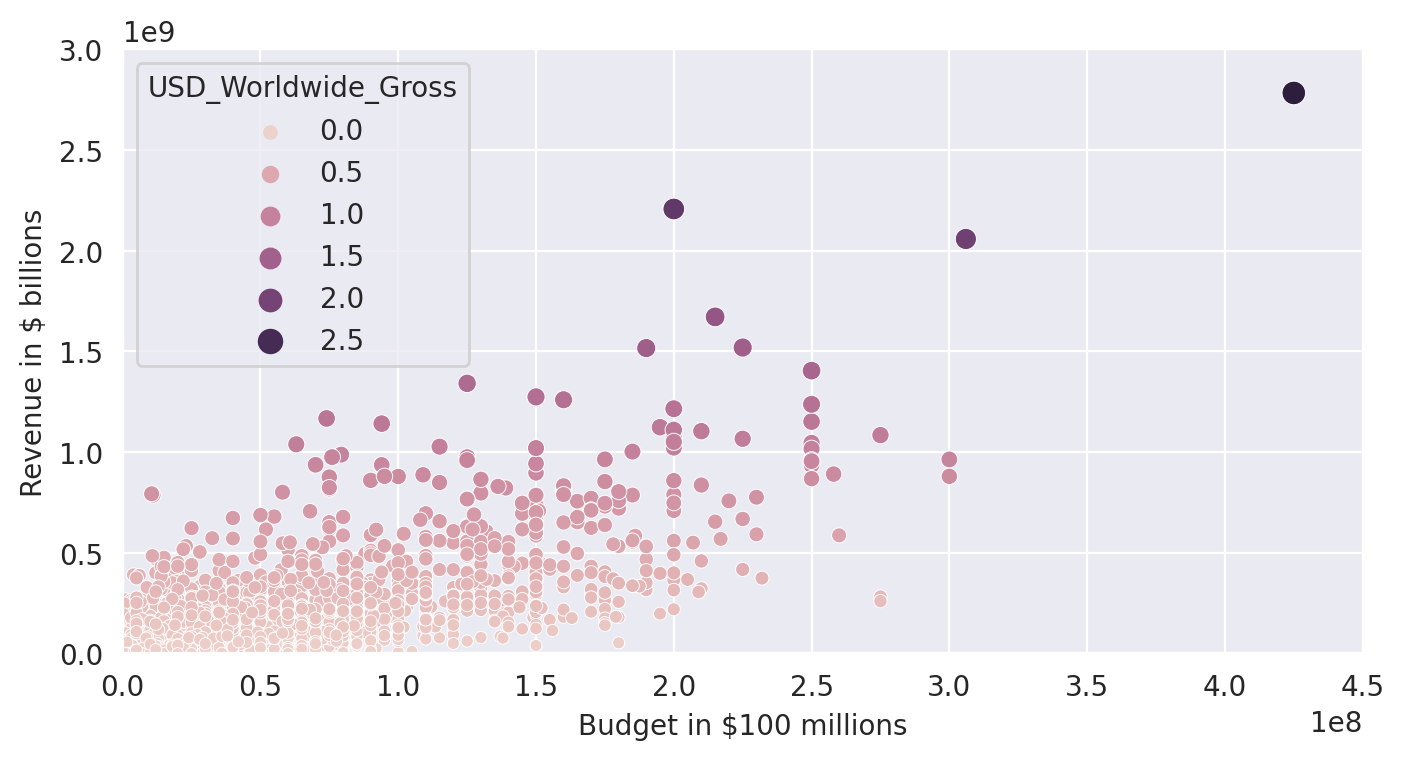

In [83]:
# seaborn scatterplot
plt.figure(figsize=(8,4), dpi=200)

# to set styling on a single chart, use "with" keyword
with sns.axes_style("darkgrid"): # other themes: whitegrid, dark, ticks
       ax = sns.scatterplot(data=data_clean, 
                            x="USD_Production_Budget",
                            y="USD_Worldwide_Gross",
                            hue="USD_Worldwide_Gross", # hue = color
                            size="USD_Worldwide_Gross", # dot size
                            )

       ax.set(ylim=(0, 3000000000),
              xlim=(0, 450000000),
              ylabel="Revenue in $ billions",
              xlabel="Budget in $100 millions")

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



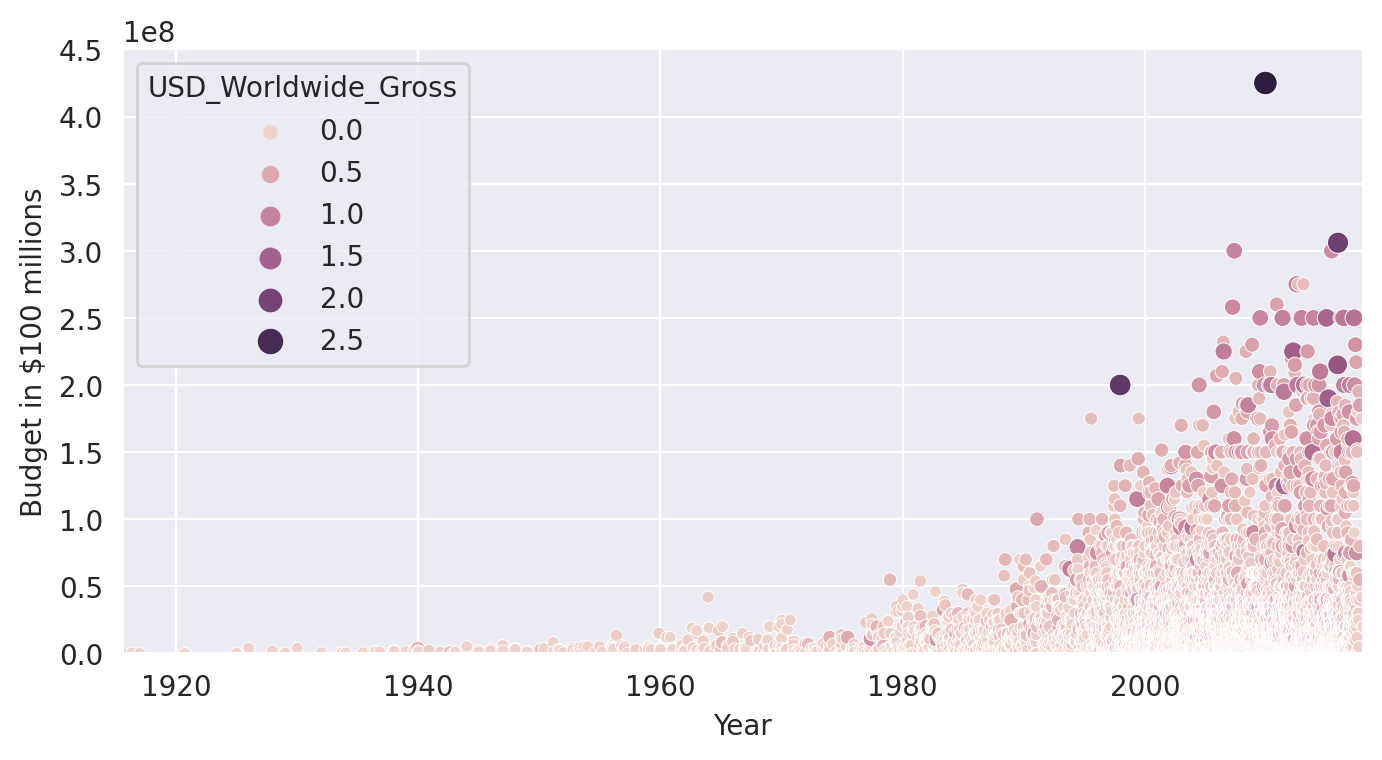

In [84]:
# seaborn scatterplot
plt.figure(figsize=(8,4), dpi=200)

# to set styling on a single chart, use "with" keyword
with sns.axes_style("darkgrid"): # other themes: whitegrid, dark, ticks
       ax = sns.scatterplot(data=data_clean, 
                            x="Release_Date",
                            y="USD_Production_Budget",
                            hue="USD_Worldwide_Gross", # hue = color
                            size="USD_Worldwide_Gross", # dot size
                            )

       ax.set(ylim=(0, 450000000),
              xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
              ylabel="Budget in $100 millions",
              xlabel="Year")

plt.show()

From the chart we can observe that:
* Movie budgets have just exploded in the last 40 years or so. 
* Up until the 1970s, the film industry appears to have been in an entirely different era. 
* Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. 
* Also, the industry has grown massively, producing many more films than before.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [103]:
datetime_index = pd.DatetimeIndex(data_clean.Release_Date)

In [111]:
# standard division
print(5.0 / 2)

# floor division
print(5.0 // 2)
# the difference to standard division is that the result is rounded down

# how to convert year to decade
a = 1999 // 10
b = a * 10
b

2.5
2.0


1990

In [113]:
years = datetime_index.year
decades = years//10*10 # use floor division and multiplication to convert from years to decades
data_clean["Decade"] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [117]:
old_films = data_clean.query("Decade <= 1960")
new_films = data_clean.query("Decade > 1960")

In [118]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [119]:
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


We can observe that:
* There are 153 films that was released before the 1960s
* The movie with the highest production budget was `Cleopatra` with $42million which was released in 1963

Now let's take a look at `new_films`

In [121]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00","31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
std,"1,549.33","40,758,580.67","170,424,978.36","66,702,734.68",9.58
min,1.00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50","5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00","18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50","40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"


In [122]:
new_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010


We can observe that:
* There are 5,231 films that were made after the 1960s
* The movie with the highest production budget is `Avatar` with $425million which was released in 2009

# Seaborn Regression Plots

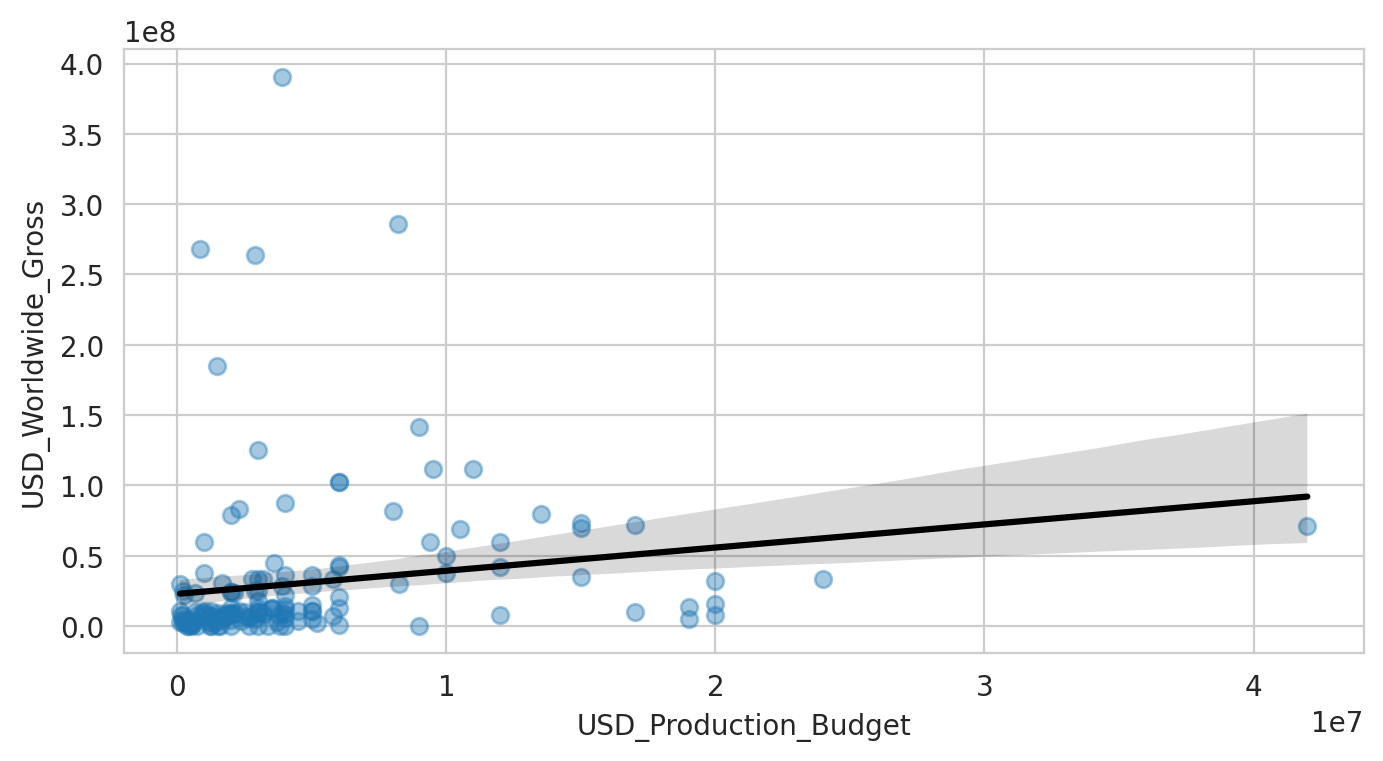

In [139]:
# visualise the relationship between the movie budget and the worldwide revenue using linear regression for old_films

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                scatter_kws= {"alpha": 0.4}, # transparency (alpha)
                line_kws= {"color": "black"})

plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

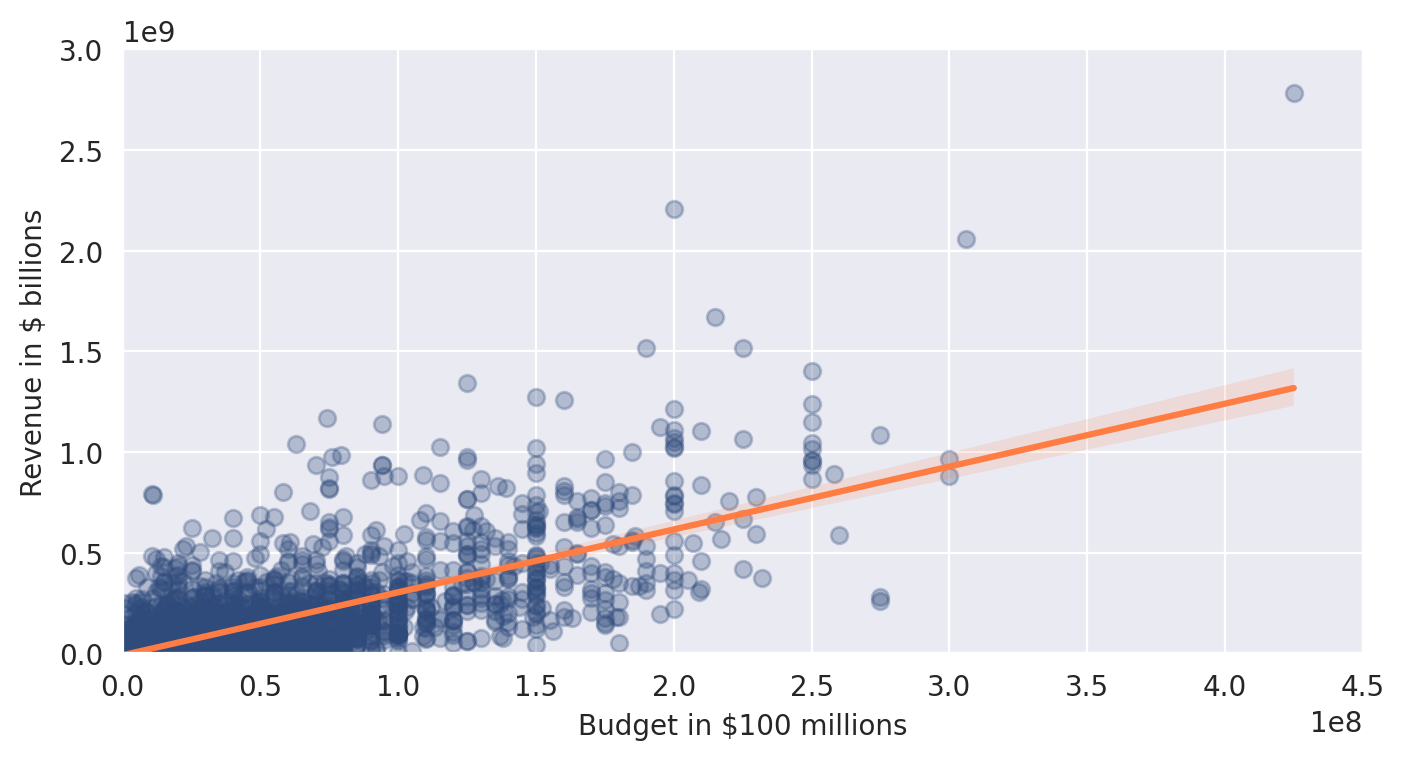

In [145]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                color="#2f4b7c", # dark blue
                scatter_kws={"alpha": 0.3},
                line_kws={"color": "#ff7c43"}) # orange

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')
plt.show()

We can observe that:
* A film with $150 million budget is predicted to make slightly under $500 million by our regression line

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [147]:
# import the library: from sklearn.linear_model import LinearRegression

# First create a LinearRegression object
regression = LinearRegression()


In [148]:
# Second, specify our features and targets

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [149]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [150]:
regression.intercept_

array([-8650768.00661029])

In [151]:
regression.coef_

array([[3.12259592]])

Both the <code>intercept_</code> and `coef_` are simply attributes of the <code>LinearRegression</code> object.<br><br>
Based on the `intercept_` data, we can observe that:
* If a movie budget is $0, the estimated movie revenue is -$8.65 million
* This data is clearly unrealistic  

Based on the `coef_` data, we can observe that:
* For every extra $1 in the production budget, the movie revenue increases by $3.1
* This means the higher the budget, the higher the estimated revenue

In [152]:
# One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.
regression.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. 

**Challenge**: Run a linear regression for the `old_films`. <br><br>Calculate the: 
* intercept
* slope  
* r-squared

How much of the variance in movie revenue does the linear model explain in this case?

In [153]:
# Define the explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [154]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [155]:
regression.intercept_

array([22821538.63508038])

From the `intercept_`, we can observe that:
* For a film with $0 production budget, the estimate revenue is $22.8 million

In [156]:
regression.coef_

array([[1.64771314]])

From the `coef_`, we can observe that:
* For every extra $1 in the production budget, the movie revenue increases by $1.6

In [157]:
# r-squared
regression.score(X, y)

0.02937258620576877

Based on the `R-squared`, we can observe that our model explains only about 2.9% of the variance in movie revenue

**Summary:**
* The linear model regression is inappropriate for `old_films`
* The model is not a good fit for our data

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [158]:
# by manual calculation
22821538.63508038 + 1.64771314 * 350000000

599521137.6350803

In [182]:
# by using regression object
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0][0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f"The estimated revenue for a $350 million film is around ${revenue_estimate:}.")

The estimated revenue for a $350 million film is around $600000000.0.
